In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam

np.set_printoptions(suppress=True)
%matplotlib inline

In [17]:
df = pd.read_csv('cars_data.csv')
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


In [24]:
#data cleaning
df['horsepower'] = pd.to_numeric(df.horsepower, errors='coerce')
df.horsepower.fillna(df.horsepower.mean(), inplace=True)

In [25]:
#scale data
y = df.mpg
X = df.drop(['mpg', 'car_name', 'origin'], axis=1)
scalar = StandardScaler()
X = scalar.fit_transform(X)
X[:3]
y = y.values
y[:10]

array([18., 15., 18., 16., 17., 15., 14., 14., 14., 15.])

In [26]:
#set up the optimizer
opt = Adam(learning_rate=0.001)
opt.get_config()

{'name': 'Adam',
 'learning_rate': 0.001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [37]:
#create the model
model = Sequential()
model.add(Dense(units=16, activation='relu', input_shape=(6,), name='L1'))
model.add(Dense(units=8, activation='relu', name='L2'))
model.add(Dense(units=1, activation='linear', name='L3'))
model.compile(loss='mse', optimizer=opt, metrics=['accuracy','AUC','Precision','Recall'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1 (Dense)                   (None, 16)                112       
_________________________________________________________________
L2 (Dense)                   (None, 8)                 136       
_________________________________________________________________
L3 (Dense)                   (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [28]:
#fit the model
history = model.fit(X, y, epochs=30, batch_size=25, verbose=1, validation_split=0.3, shuffle=True)

Train on 278 samples, validate on 120 samples
Epoch 1/30
278/278 [==============================] - 0s 950us/sample - loss: 481.9868 - mse: 481.9868 - val_loss: 1015.9986 - val_mse: 1015.9987
Epoch 2/30
278/278 [==============================] - 0s 83us/sample - loss: 475.2386 - mse: 475.2386 - val_loss: 1002.5488 - val_mse: 1002.5488
Epoch 3/30
278/278 [==============================] - 0s 86us/sample - loss: 470.2039 - mse: 470.2039 - val_loss: 991.9227 - val_mse: 991.9227
Epoch 4/30
278/278 [==============================] - 0s 101us/sample - loss: 466.2430 - mse: 466.2430 - val_loss: 983.7724 - val_mse: 983.7725
Epoch 5/30
278/278 [==============================] - 0s 92us/sample - loss: 462.3060 - mse: 462.3059 - val_loss: 977.1506 - val_mse: 977.1506
Epoch 6/30
278/278 [==============================] - 0s 104us/sample - loss: 458.1324 - mse: 458.1324 - val_loss: 970.7532 - val_mse: 970.7531
Epoch 7/30
278/278 [==============================] - 0s 97us/sample - loss: 453.7433 - m

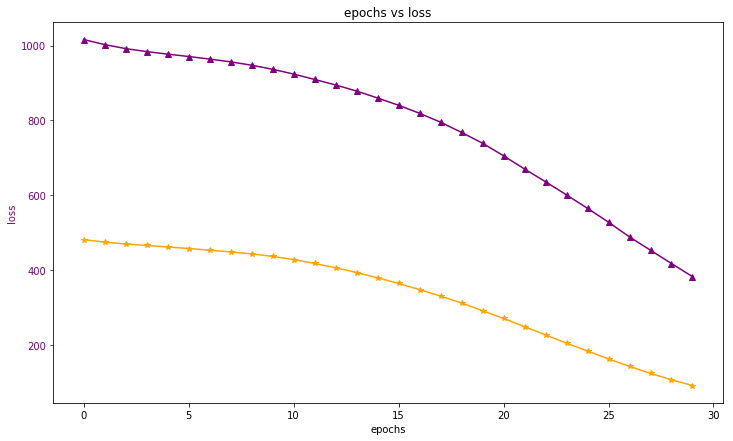

In [29]:
#Plot the output
fig, ax1 = plt.subplots(1,1,figsize=(12,7))
ax1.plot(history.epoch, history.history['val_mse'], marker='^', color='purple')
ax1.plot(history.epoch, history.history['mse'], marker='*', color='orange')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss', color='purple')
ax1.tick_params('y', colors='purple')
plt.title('epochs vs loss');